In [1]:
import numpy as np

In [3]:
rgb_to_xyz = np.array([
    [0.4124564, 0.3575761, 0.1804375],
    [0.2126729, 0.7151522, 0.0721750],
    [0.0193339, 0.1191920, 0.9503041]])

xyz_to_lms = np.array([
    [0.4002, 0.7076, -0.0808],
    [-0.2263, 1.1653, 0.0457],
    [0, 0, 0.9182]])

In [15]:
T_protanopia = np.array([
    [0.170556992, 0.829443014, 0],
    [0.170556991, 0.829443008, 0],
    [-0.004517144, 0.004517144, 1]
])

# Deuteranopia transformation matrix
T_deuteranopia = np.array([
    [0.33066007, 0.66933993, 0],
    [0.33066007, 0.66933993, 0],
    [-0.02785538, 0.02785538, 1]
])

# Tritanopia transformation matrix
T_tritanopia = np.array([
    [1, 0.1273989, -0.1273989],
    [0, 0.8739093, 0.1260907],
    [0, 0.8739093, 0.1260907]
])

# Achromatopsia transformation matrix
T_achromatopsia = np.array([
    [0.2126, 0.7152, 0.0722],
    [0.2126, 0.7152, 0.0722],
    [0.2126, 0.7152, 0.0722]
])

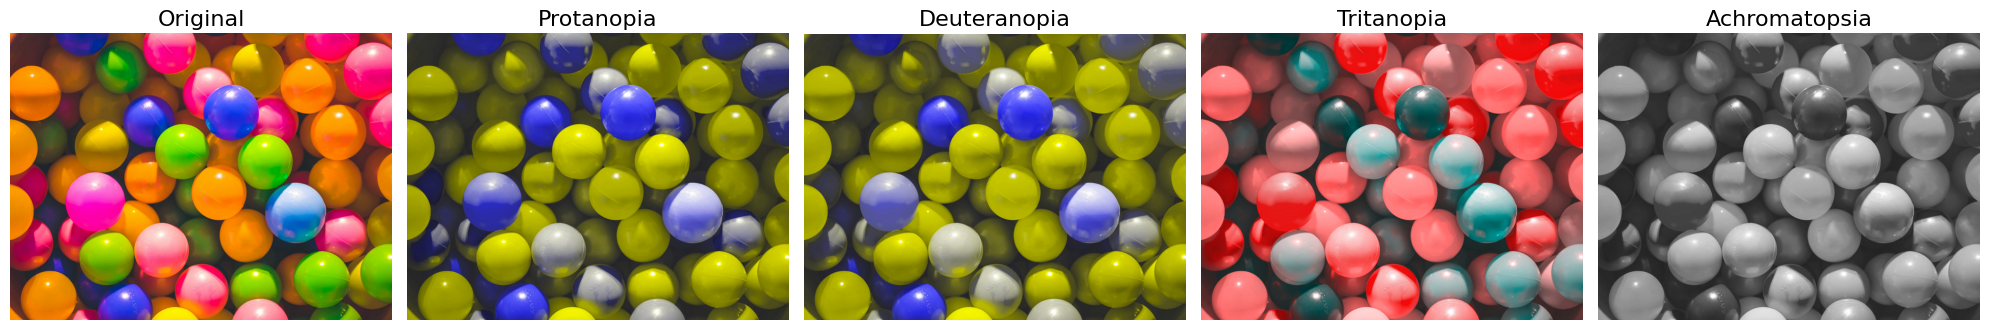

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Open the image and convert it to RGB format
image = Image.open('colorful-balls.jpg').convert('RGB')
rgb_array = np.array(image) / 255.0  # Normalize to [0, 1] range

# Step 2: Define transformation matrices
T_protanopia = np.array([
    [0.170556992, 0.829443014, 0],
    [0.170556991, 0.829443008, 0],
    [-0.004517144, 0.004517144, 1]
])

T_deuteranopia = np.array([
    [0.33066007, 0.66933993, 0],
    [0.33066007, 0.66933993, 0],
    [-0.02785538, 0.02785538, 1]
])

T_tritanopia = np.array([
    [1, 0.1273989, -0.1273989],
    [0, 0.8739093, 0.1260907],
    [0, 0.8739093, 0.1260907]
])

T_achromatopsia = np.array([
    [0.2126, 0.7152, 0.0722],
    [0.2126, 0.7152, 0.0722],
    [0.2126, 0.7152, 0.0722]
])

# Step 3: Function to apply a color transformation
def apply_transformation(rgb_array, transformation_matrix):
    reshaped_rgb = rgb_array.reshape((-1, 3))
    transformed_rgb = reshaped_rgb @ transformation_matrix.T  # Matrix multiplication
    transformed_rgb = np.clip(transformed_rgb, 0, 1)  # Keep values in [0, 1]
    return transformed_rgb.reshape(rgb_array.shape)

# Step 4: Apply transformations
transformed_protanopia = apply_transformation(rgb_array, T_protanopia)
transformed_deuteranopia = apply_transformation(rgb_array, T_deuteranopia)
transformed_tritanopia = apply_transformation(rgb_array, T_tritanopia)
transformed_achromatopsia = apply_transformation(rgb_array, T_achromatopsia)

# Step 5: Convert back to 8-bit format (0-255) for display
def to_image(array):
    return (array * 255).astype(np.uint8)

original_image = to_image(rgb_array)
protanopia_image = to_image(transformed_protanopia)
deuteranopia_image = to_image(transformed_deuteranopia)
tritanopia_image = to_image(transformed_tritanopia)
achromatopsia_image = to_image(transformed_achromatopsia)

# Step 6: Prepare labeled figure for side-by-side display and saving
titles = ['Original', 'Protanopia', 'Deuteranopia', 'Tritanopia', 'Achromatopsia']
images = [original_image, protanopia_image, deuteranopia_image, tritanopia_image, achromatopsia_image]

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=16)
    ax.axis('off')

# Save the figure with labels
plt.tight_layout()
plt.savefig('colorful_balls_color_blind.jpg', dpi=300, bbox_inches='tight')
plt.show()